<a href="https://colab.research.google.com/github/breynerciro/MetNumUN2024I/blob/main/Lab%209.2/bciro_LABCramer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Cramer by hand

$$A = \left[
  \begin{array}{cc}
1 & 2\\
3 & 4
\end{array}
\right],  
b= \left[
\begin{array}{c}
5\\
6
\end{array}
\right]
$$
$$
Ax =B
$$
$$  
\left[
  \begin{array}{cc}
1 & 2\\
3 & 4
\end{array}
\right]
\left[
\begin{array}{c}
x_1\\
x_2
\end{array}
\right]  
=
\left[
\begin{array}{c}
5\\
6
\end{array}
\right]
$$

$$Det\ A =  (1 * 4) - (3 * 2)  = 4 - 6 = -2$$

$$A_1 = \left[
  \begin{array}{cc}
5 & 2\\
6 & 4
\end{array}
\right]
$$

$$Det\ A_1 = (5 * 4) - (6 * 2) = 20 - 12 =  8$$

$$x_1 =  \frac{Det\ A_1}{Det\ A}= \frac{8}{-2} =  -4$$

$$A_2 = \left[
  \begin{array}{cc}
1 & 5\\
3 & 6
\end{array}
\right]
$$

$$Det\ A_2 = (1*6) - (3*5)  = 6 -15 = -9$$

$$x_2 = \frac{Det\ A_2}{Det\ A}= \frac{-9}{-2} =  \frac{9}{2}$$

- ***Adding a single digit to any number requires about 7.30 bits of processing.*** - World Mental Calculation: News and Resources for Competitive and Advanced Mental Calculation https://worldmentalcalculation.com/2019/06/30/fastest-possible-processing-speed-of-the-human-brain/

- ***The human brain can process 11 million bits of information every second. But our conscious minds can handle only 40 to 50 bits of information a second.*** - Understanding Unconscious Bias https://www.npr.org/2020/07/14/891140598/understanding-unconscious-bias

- ***A new way to analyze human reaction times shows that the brain processes data no faster than 60 bits per second.***- New Measure of Human Brain Processing Speed https://www.technologyreview.com/2009/08/25/210267/new-measure-of-human-brain-processing-speed/




# Number of operations to compute a determinant by cofactor expasion
- Cofactor expansion https://people.math.carleton.ca/~kcheung/math/notes/MATH1107/07/07_cofactor_expansion.html
## Definition of A(i∣j)
Let $A$ be an $n\times n$ matrix. Let $i,j \in \{1,…,n\}$. We define $A(i∣j)$  to be the matrix obtained from $A$ by removing row $i$ and column $j$ from $A$.

## Cofactor formula
One way of computing the determinant of an $n\times n$  matrix

$$A = \left[
  \begin{array}{cccc}
a_{11} & a_{12} & \cdots & a_{1n}\\
a_{21} & a_{22} & \cdots & a_{2n}\\
\vdots  & \vdots & \ddots & \vdots\\
a_{n1} & a_{n2} & \cdots & a_{nn}\\
\end{array}
\right]
$$
is to use the following formula called the cofactor formula.

Pick either any $i\ \in \{1,…,n\}$ (fixed row) or $i\ \in \{1,…,n\}$ (fixed column). Then

$$\det(A)  = \sum_{j=1}^n (-1)^{i+j}a_{ij} \det(A(i∣j)) $$


$C_{i,j}= (-1)^{i+j}a_{ij} \det(A(i∣j))$ is called a cofactor of $A$.

$$\det(A)  = \sum_{j=1}^n C_{i,j} $$



In [1]:
# Code from https://stackoverflow.com/questions/16510111/computing-determinant-of-a-matrix-nxn-recursively

import numpy as np

def smaller_matrix(original_matrix,row, column):
    for ii in range(len(original_matrix)):
        new_matrix=np.delete(original_matrix,ii,0)
        new_matrix=np.delete(new_matrix,column,1)
        return new_matrix


def determinant(matrix):
    """Returns a determinant of a matrix by recursive method."""
    (r,c) = matrix.shape
    if r != c:
        print("Error!Not a square matrix!")
        return None
    elif r==2:
        simple_determinant = matrix[0][0]*matrix[1][1]-matrix[0][1]*matrix[1][0]
        return simple_determinant
    else:
        answer=0
        for j in range(r):
            cofactor = (-1)**(0+j) * matrix[0][j] * determinant(smaller_matrix(matrix, 0, j))
            answer+= cofactor
        return answer

In [2]:
#test the function
#Only works for numpy.array input
np.random.seed(1)

In [3]:
n = 2
matrix=np.random.randint(-5,5,size=(n,n))
matrix

array([[0, 3],
       [4, 0]])

In [4]:
determinant(matrix)

-12

In [5]:
np.linalg.det(matrix)

-12.0

In [6]:
round(np.linalg.det(matrix))

-12

In [7]:
n = 5
matrix=np.diag(np.random.randint(-10,10,size=(n)))
matrix

array([[  5,   0,   0,   0,   0],
       [  0, -10,   0,   0,   0],
       [  0,   0,   6,   0,   0],
       [  0,   0,   0,  -9,   0],
       [  0,   0,   0,   0,   2]])

In [8]:
determinant(matrix)

5400

In [9]:
np.linalg.det(matrix)

5400.000000000003

In [10]:
round(np.linalg.det(matrix))

5400

In [11]:
# Modified from the previous code
import numpy as np

# A a squared numpy matrix
def det(A):
    """Returns a determinant of a matrix by recursive method."""
    (r,c) = A.shape
    if r != c:
        print("Error!Not a square matrix!")
        return None
    elif r==1:
          # the code with  r==2 is more efficient but we use this
         # because the number of operations is easier to compute
        return A[0][0]
    else:
        answer=0
        for j in range(r):
            s = 1 if (0+j)%2 == 0 else -1
            Aij = np.delete(A,0,0)
            Aij = np.delete(Aij,j,1)
            cofactor = (s) * A[0][j] * det(Aij)
            answer+= cofactor
        return answer

In [12]:
#test the function
#Only works for numpy.array input
np.random.seed(1)

In [13]:
n = 2
A=np.random.randint(-5,5,size=(n,n))
A

array([[0, 3],
       [4, 0]])

In [14]:
det(A)

-12

In [15]:
determinant(A)

-12

In [16]:
np.linalg.det(A)

-12.0

In [17]:
round(np.linalg.det(A))

-12

In [18]:
n = 10

A=np.random.randint(-10,10,size=(n,n))

A

array([[  5, -10,   6,  -9,   2,  -3,   3,  -4,   8,  -5],
       [  8,   1,   0,   4,   8,  -6,  -1,   7, -10,   3],
       [ -1,  -1,  -3,  -9, -10,   7,  -2,   3,   9,   5],
       [  0,  -2,  -3,  -7,  -4,   7,  -7,  -6,   7,   1],
       [  2,   6,   3,   9,  -1,   8,   5, -10,  -6,   5],
       [ -8,  -3,  -2,  -1,  -7,  -3,  -6,  -5,   9,  -4],
       [ -2, -10,  -8,   0,   5,   5,  -3,   9,   0,   4],
       [-10,  -9,   7,   3,  -7, -10,   3,  -4,  -4,  -8],
       [  2,   1,  -3,   3,  -2,   1,   2,   1,  -6,  -3],
       [ -3,   3,  -6,   6,   8, -10,   3,   0,   7,  -3]])

In [19]:
import time

start_time = time.time()
d = det(A)
end_time = time.time()

In [20]:
print("det(A): ",d)
print("time: ",end_time - start_time)

det(A):  29129065307
time:  88.54207396507263


In [21]:
import time

start_time = time.time()
d = determinant(A)
end_time = time.time()

In [22]:
print("determinant(A): ",d)
print("time: ",end_time - start_time)

determinant(A):  29129065307
time:  32.647164821624756


In [23]:
import time

start_time = time.time()
d = np.linalg.det(A)
end_time = time.time()

In [24]:
print("np.linalg.det(A): ",d)
print("time: ",end_time - start_time)

np.linalg.det(A):  29129065306.99992
time:  0.0002765655517578125


# Estimating the time by instruction in Python in a Colab machine

In [25]:
import numpy as np

n = 100

A = np.ones((n,n))

A

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [26]:
B = np.ones((n,n))

B

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [27]:
import time

C= np.zeros((n,n))

start_time = time.time()
for i in range(n):
        for j in range(n):
            C[i][j] = 0
            for k in range(len(A[0])):
                C[i][j] += A[i][k] * B[k][j]
end_time = time.time()
print(end_time - start_time)

1.17002272605896


In [28]:
C

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [29]:
time_by_oper_python = (end_time - start_time)/(2*n**3 - n**2)

time_by_oper_python

5.87951118622593e-07

In [30]:
import time
import numpy as np

start_time = time.time()
C = A@B
end_time = time.time()
print(end_time - start_time)

0.005077362060546875


In [31]:
C

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

In [32]:
time_by_oper_numpy = (end_time - start_time)/(2*n**3 - n**2)

time_by_oper_numpy

2.551438221380339e-09

# Time estimation for the digital computer computation of a 3 x 3 matrix determinant by cofactor expansion

The number of operations $(+,-,*)$ perfomed  *det(A)* algorithm that calculates

$$\det(A)  = \sum_{j=1}^n (-1)^{i+j}a_{ij} \det(A(i∣j)) $$

is given by

$$\begin{array}{lll}
T(n) & =&  nT(n-1) + 5n , T(1) = 1\\
\end{array}
$$

$$\begin{array}{lll}
T(n) & =&  nT(n-1) + 5n\\
     & =&  n[(n-1) T(n-2) + 5 (n-1) +10] + 5n  \\
     & =&  n(n-1) T(n-2) + 5 n  (n-1) + 5n \\
     & =&  n(n-1) [(n-2) T(n-3) + 5 (n-2)] + 5 n(n-1) + 5n\\
     & = & n(n-1)(n-2) T(n-3) + 5n(n-1)(n-2)+  5 n  (n-1) + 5n \\
     & \vdots\\
     & = &  n(n-1)(n-2)\cdots (n -(n-2))  T(1) + [5n(n-1)(n-2)(n-3)\cdots (n -(n-3))] + \cdots + [5 n (n-1)]+ 5n \\
    & = & n! + [5n(n-1)(n-2)(n-3)\cdots 2] + [5n(n-1)(n-2)(n-3)\cdots 3]+ \cdots +[5 n (n-1) (n-3)] + [5 n (n-1)]+ 5n  
\end{array}
$$

$$T(n) = n! + 5 \sum_{i=0}^{n-1} n!/i! = n! + 5 n!\sum_{i=0}^{n-1} \frac{1}{i!} < n! + 5 e n! < 16 n!  $$

1. Asumming that an arithmetic operation takes the *time_by_oper_python* estimated before,  what is the maximun square matrix size for which the deteminant can be computed with cofactor extesion in $\le$ 3 minute. Report the time at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing).

2. Run an experiment with a random matrix of that size and report the time at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing).

If the determinant of a $n \times n$ square matrix takes $16 n!$ operations how much takes the Crammer solution of $n \times n$ systems of linear equations?






#1. maximun square matrix size

In [33]:
#Punto 1
import math


time_by_oper_python = 5.8 * 10**(-7)


def compute_time(n):
    factorial_n = math.factorial(n)
    e_approx = math.e
    return factorial_n + 5 * e_approx * factorial_n


time_limit_seconds = 3 * 60


max_size = 1
while True:
    time_required = compute_time(max_size) * time_by_oper_python
    if time_required > time_limit_seconds:
        break
    max_size += 1

print("Tamaño máximo de matriz:", max_size - 1)
print("Tiempo requerido para este tamaño de matriz:", compute_time(max_size - 1) * time_by_oper_python, "segundos")


Tamaño máximo de matriz: 10
Tiempo requerido para este tamaño de matriz: 30.71059718742533 segundos


#2. Experiment time

In [35]:
n = 10

C = np.random.randint(-5,5,size=(n,n))

print ('C:', C)

start_time = time.time()
d = det(C)
end_time = time.time()
print("determinant(C): ", d)
print("time: ",end_time - start_time)

C: [[ 4  1 -5 -5 -3  4  1 -5  1  2]
 [-5 -2  4 -5 -2 -1  2  0 -2  3]
 [ 3 -5  1  2  4  0 -1  4  0 -3]
 [ 0  1  1  3  2  2  2 -3  1 -5]
 [ 0 -3 -4  3  0  4 -1  4 -4 -3]
 [-5 -1  2 -5  1 -3 -1 -2  1  2]
 [ 1 -2 -5  1 -1  2  1 -3  4  0]
 [ 4  4  4  3  1 -1 -3  4 -1 -5]
 [-5 -2 -1  4 -2  4 -4 -3  0 -1]
 [-5  3 -3 -2  4  4 -1 -1  3 -3]]
determinant(C):  -117699106
time:  74.06277656555176


# Time estimation for the human computer computation of a 3 x 3 matrix determinant by cofactor expansion

 Write a 3 x 3 matrix with the first element as your list number Mod 10 and the rest row by row 1,2,3,...9 skipimg the first element, by example if youir list number is 12, your list number Mod 10 is 2 and the matrix is
$$A = \left[
  \begin{array}{ccc}
2 & 1 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{array}
\right]
$$
Use a chronometer like http://online-stopwatch.chronme.com/ to estimate the time to compute the determinant by using the procedure in the follo wing exmaple (https://people.math.carleton.ca/~kcheung/math/notes/MATH1107/07/07_cofactor_expansion.html):<br />  
Let
$$A = \begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6\\ 7 & 8 & 9 \end{bmatrix}$$
we compute $\det(A)$ by expanding along row $2$ as <br /> <br />
$$\begin{eqnarray} \det(A) & = & (-1)^{2+1}A_{2,1}\det(A(2 \mid 1)) + (-1)^{2+2}A_{2,2}\det(A(2 \mid 2)) + (-1)^{2+3}A_{2,3}\det(A(2 \mid 3)) \\ & = & -4\left|\begin{matrix} 2 & 3 \\ 8 & 9\end{matrix}\right| + 5\left|\begin{matrix} 1 & 3 \\ 7 & 9\end{matrix}\right| - 6\left|\begin{matrix} 1 & 2 \\ 7 & 8\end{matrix}\right| \\ & = & -4(2\cdot 9 - 3\cdot 8) + 5(1 \cdot 9- 3\cdot 7) - 6(1\cdot 8 - 2 \cdot 7) \\ & = & 24 - 60 + 36 \\ & = & 0 \end{eqnarray}$$
3. Report the time at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing)
4. Report the value of the determinant at [LABCramer](https://docs.google.com/spreadsheets/d/1JNUbuj3QHcyPmp8i6kNreUFucj2mOvKHkCFHHy7zfws/edit?usp=sharing)


#3. Human computer time
## My list number is 1 Mod 10 is 1
$$A = \left[
  \begin{array}{ccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{array}
\right]
$$

In [48]:
aList = [[1,2,3],[4,5,6],[7,8,9]]
A = np.array(aList)
det(A)

0

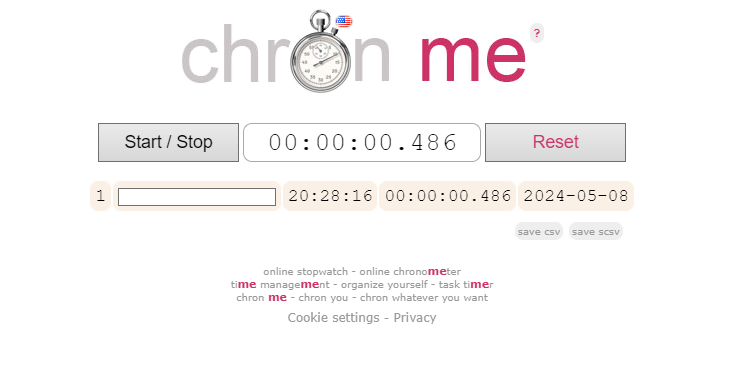

#4. Determinant

$$A = \left[
  \begin{array}{ccc}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9\\
\end{array}
\right]
$$
\
$$
det(A)=(-1)^{2+1}A_{2,1}det(A(2|1))+(-1)^{2+2}A_{2,2}det(A(2|2))+(-1)^{2+3}A_{2,3}det(A(2|3))
$$
\
$$= -4\left[
  \begin{array}{cc}
2 & 3\\
8 & 9\\
\end{array}
\right]+5 \left[
  \begin{array}{cc}
1 & 3\\
7 & 9\\
\end{array}
\right]-6 \left[
  \begin{array}{cc}
1 & 2\\
7 & 8\\
\end{array}
\right]
$$
\
$$= -4(2*9-3*8)+5(1*9-3*7)-6(1*8-2*7)$$
\
$$=24-60+36$$
\
$$=0$$

Valor del determinante = 0